Getting Dataset from Kaggle e.g.titanic


---

Reference : https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8


In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
!ls

 gender_submission.csv	 kaggle.json   test.csv
'kaggle (1).json'	 sample_data   train.csv


In [0]:
!cp kaggle.json ../root/.kaggle

In [0]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

 gender_submission.csv	 kaggle.json   test.csv
'kaggle (1).json'	 sample_data   train.csv


In [0]:
# Import pandas if you already haven't
import pandas as pd

# Import the test and train datasets into pandas dataframe
df_train = pd.read_csv('train.csv', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('test.csv', header=0, sep=',', quotechar='"')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



picked 7 variable which may effect the survival of the people on Titanic


1. pclass
2. sex
3. age
4. Sipsp
5. Parch
6. cabin
7. embarked 

we need to study if these variables are effecting survival or not


In [0]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Garfirth, Mr. John",male,1601,B96 B98,S
freq,1,577,7,4,644


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


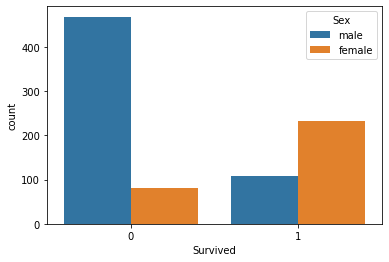

In [0]:
sns.countplot(x='Survived', data=df_train, hue='Sex') #to study Pclass, Sex,Embarked

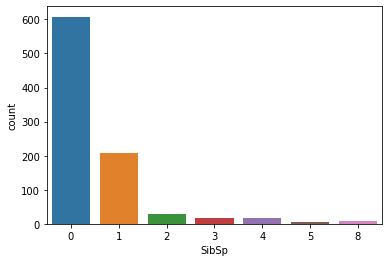

In [0]:
sns.countplot(df_train['SibSp'], data=df_train)

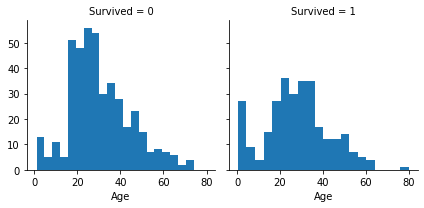

In [0]:
g = sns.FacetGrid(df_train, col='Survived') #to studyAge
g.map(plt.hist, 'Age', bins=20)

**Pclass, Sex,Age,Embarked affects the survival of the person, these are the input information to the model**

In [0]:
X_draft = df_train[['Pclass', 'Sex','Age','Embarked', 'Survived']]

In [0]:
X_draft.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [0]:
X_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Embarked    889 non-null object
Survived    891 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


**Handling Categorical values**

In [0]:
cleanup_nums = {"Sex":     {"male": 0, "female": 1},
                "Embarked": {"S": 0, "C": 1, "Q": 2 }}

In [0]:
X_draft.replace(cleanup_nums, inplace=True)
X_draft.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Pclass,Sex,Age,Embarked,Survived
0,3,0,22.0,0.0,0
1,1,1,38.0,1.0,1
2,3,1,26.0,0.0,1
3,1,1,35.0,0.0,1
4,3,0,35.0,0.0,0


In [0]:
X_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
Embarked    889 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


**Handling missing values**

In [0]:
X_draft.dropna

<bound method DataFrame.dropna of      Pclass  Sex   Age  Embarked  Survived
0         3    0  22.0       0.0         0
1         1    1  38.0       1.0         1
2         3    1  26.0       0.0         1
3         1    1  35.0       0.0         1
4         3    0  35.0       0.0         0
..      ...  ...   ...       ...       ...
886       2    0  27.0       0.0         0
887       1    1  19.0       0.0         1
888       3    1   NaN       0.0         0
889       1    0  26.0       1.0         1
890       3    0  32.0       2.0         0

[891 rows x 5 columns]>

In [0]:
X_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
Embarked    889 non-null float64
Survived    891 non-null int64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


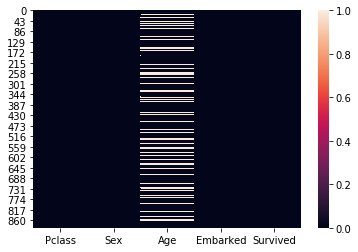

In [0]:
sns.heatmap(X_draft.isnull())

In [0]:
X_draft = X_draft[X_draft.Age >0]


In [0]:
X_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
Pclass      714 non-null int64
Sex         714 non-null int64
Age         714 non-null float64
Embarked    712 non-null float64
Survived    714 non-null int64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [0]:
X_draft = X_draft.dropna()

In [0]:
X_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 5 columns):
Pclass      712 non-null int64
Sex         712 non-null int64
Age         712 non-null float64
Embarked    712 non-null float64
Survived    712 non-null int64
dtypes: float64(2), int64(3)
memory usage: 33.4 KB


In [0]:
 X = X_draft[['Pclass', 'Sex','Age','Embarked']]

In [0]:
 y = X_draft[['Survived']]

**Do same to test data**

In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
X_test_draft = df_test[['Pclass', 'Sex','Age','Embarked']]


In [0]:
X_test_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
Embarked    418 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB


In [0]:
cleanup_nums = {"Sex":{"male": 0, "female": 1},
                "Embarked": {"S": 0, "C": 1, "Q": 2 }}


In [0]:
X_test_draft.replace(cleanup_nums, inplace=True)
X_test_draft.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Pclass,Sex,Age,Embarked
0,3,0,34.5,2
1,3,1,47.0,0
2,2,0,62.0,2
3,3,0,27.0,0
4,3,1,22.0,0


In [0]:
X_test_draft = X_test_draft[X_test_draft.Age >0]

In [0]:
X_test_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 4 columns):
Pclass      332 non-null int64
Sex         332 non-null int64
Age         332 non-null float64
Embarked    332 non-null int64
dtypes: float64(1), int64(3)
memory usage: 13.0 KB


In [0]:
X_test = X_test_draft

**X, y : training set     
X_test : testing  
Training the model with these training data set**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logmodel.predict(X_test)

In [0]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [0]:
acc_log = round(logmodel.score(X, y) * 100, 2)
acc_log

79.35

In [0]:
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


62.08

In [0]:
sgd = SGDClassifier()
sgd.fit(X, y)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X, y) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


67.98

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

91.15

In [0]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


91.15

**Evaluate model**

In [0]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [acc_svc, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,91.15
3,Decision Tree,91.15
1,Logistic Regression,79.35
0,Support Vector Machines,62.08


**Making data ready for sagemaker**

In [0]:
X.head()

,Pclass,Sex,Age,Embarked
0,3,0,22.0,0.0
1,1,1,38.0,1.0
2,3,1,26.0,0.0
3,1,1,35.0,0.0
4,3,0,35.0,0.0


In [0]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [0]:
combined_X_y = pd.concat([y,X], axis= 1)

In [0]:
type(combined_X_y)

pandas.core.frame.DataFrame

In [0]:
combined_X_y.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,0.0
1,1,1,1,38.0,1.0
2,1,3,1,26.0,0.0
3,1,1,1,35.0,0.0
4,0,3,0,35.0,0.0


In [0]:
train_sagemaker = combined_X_y


In [0]:
from google.colab import files

train_sagemaker.to_csv('train_sagemaker.csv', header=None, index=None)
files.download('train_sagemaker.csv')